In [15]:
import pandas as pd

train_data = pd.read_csv('C:\\Users\\njh45\\OneDrive\\바탕 화면\\study_performance.csv')

In [16]:
list(train_data)

# 행과 열의 개수를 확인하는 코드
rows, columns = train_data.shape
print(f"행의 개수: {rows}, 열의 개수: {columns}")

행의 개수: 1000, 열의 개수: 8


In [17]:
# 결측치가 있는 열들만 추출하고 결측치 개수 계산
missing_data = train_data.isnull().sum() # ,isnull()는 value가 결측값이면 True 아니면 False 반환
missing_columns = missing_data[missing_data > 0]

# 결과 출력
print("결측치가 있는 컬럼들:")
print(missing_columns)

결측치가 있는 컬럼들:
Series([], dtype: int64)


In [18]:
# 데이터 형식이 object인 컬럼들만 추출
object_columns = train_data.select_dtypes(include=['object'])

# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)

# 결과 출력
print("데이터 형식이 object인 컬럼들:")
object_columns

# NaN값, 숫자, ok 라는 값의 열의 존재 확인

데이터 형식이 object인 컬럼들:


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [19]:
# 'race_ethnicity' 컬럼의 고유값 확인
unique_values = train_data['race_ethnicity'].unique()
print(unique_values)


['group B' 'group C' 'group A' 'group D' 'group E']


In [20]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
le = LabelEncoder()

# 'race_ethnicity' 컬럼에 대해 레이블 인코딩 수행
train_data['race_ethnicity_encoded'] = le.fit_transform(train_data['race_ethnicity'])

# 결과 확인 (레이블 인코딩 후)
print(train_data[['race_ethnicity', 'race_ethnicity_encoded']].head())

  race_ethnicity  race_ethnicity_encoded
0        group B                       1
1        group C                       2
2        group B                       1
3        group A                       0
4        group C                       2


In [21]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
le_gender = LabelEncoder()

# 'gender' 컬럼에 대해 레이블 인코딩 수행
train_data['gender_encoded'] = le_gender.fit_transform(train_data['gender'])

# 결과 확인 (레이블 인코딩 후)
print(train_data[['gender', 'gender_encoded']].head())

   gender  gender_encoded
0  female               0
1  female               0
2  female               0
3    male               1
4    male               1


In [22]:
# 'parental_level_of_education' 컬럼의 고유값 확인
unique_values = train_data['parental_level_of_education'].unique()
print(unique_values)

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [23]:
# 'lunch' 컬럼의 고유값 확인
unique_values = train_data['lunch'].unique()
print(unique_values)

['standard' 'free/reduced']


In [24]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
le_lunch = LabelEncoder()

# 'lunch' 컬럼에 대해 레이블 인코딩 수행
train_data['lunch_encoded'] = le_lunch.fit_transform(train_data['lunch'])

# 결과 확인 (레이블 인코딩 후)
print(train_data[['lunch', 'lunch_encoded']].head())

          lunch  lunch_encoded
0      standard              1
1      standard              1
2      standard              1
3  free/reduced              0
4      standard              1


In [25]:
print(train_data.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   race_ethnicity_encoded  gender_encoded  lunch_encoded  
0                       1               0              1  
1                       2         

In [27]:
# 'test_preparation_course' 컬럼에서 'none' 값의 개수 확인
none_count = (train_data['test_preparation_course'] == 'none').sum()
print(f"'test_preparation_course' 컬럼에서 'none'의 개수: {none_count}")



'test_preparation_course' 컬럼에서 'none'의 개수: 642


In [28]:
# 4개의 컬럼을 제거하는 코드
train_data = train_data.drop(columns=['test_preparation_course', 'gender', 'race_ethnicity', 'lunch'])

# 결과 확인
print(train_data.head())


  parental_level_of_education  math_score  reading_score  writing_score  \
0           bachelor's degree          72             72             74   
1                some college          69             90             88   
2             master's degree          90             95             93   
3          associate's degree          47             57             44   
4                some college          76             78             75   

   race_ethnicity_encoded  gender_encoded  lunch_encoded  
0                       1               0              1  
1                       2               0              1  
2                       1               0              1  
3                       0               1              0  
4                       2               1              1  


In [29]:
train_data

,parental_level_of_education,math_score,reading_score,writing_score,race_ethnicity_encoded,gender_encoded,lunch_encoded
0,bachelor's degree,72,72,74,1,0,1
1,some college,69,90,88,2,0,1
2,master's degree,90,95,93,1,0,1
3,associate's degree,47,57,44,0,1,0
4,some college,76,78,75,2,1,1
...,...,...,...,...,...,...,...
995,master's degree,88,99,95,4,0,1
996,high school,62,55,55,2,1,0
997,high school,59,71,65,2,0,0
998,some college,68,78,77,3,0,1


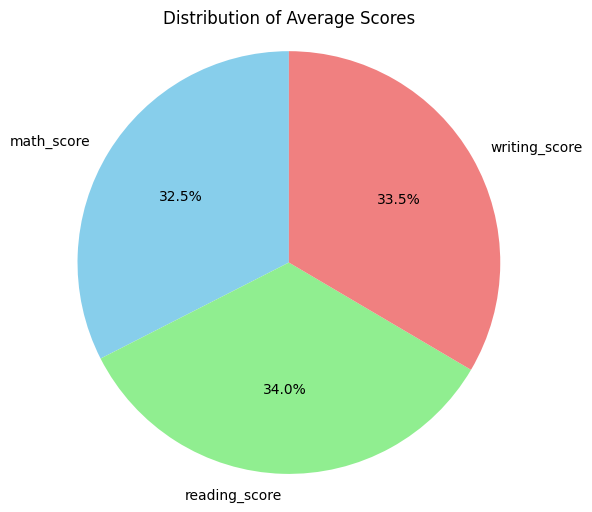

In [30]:
import matplotlib.pyplot as plt

# 3개의 컬럼만 추출
scores_data = train_data[['math_score', 'reading_score', 'writing_score']]

# 각 점수의 평균을 계산
mean_scores = scores_data.mean()

# 파이 차트 그리기
plt.figure(figsize=(6,6))
plt.pie(mean_scores, labels=mean_scores.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Average Scores')
plt.axis('equal')  # 파이 차트가 원형으로 보이게 설정
plt.show()

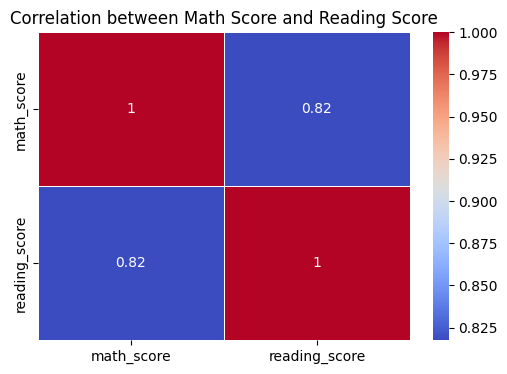

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# math_score와 reading_score 컬럼 추출
scores_data = train_data[['math_score', 'reading_score']]

# 상관관계 계산
correlation = scores_data.corr()

# 상관관계를 시각화 (히트맵)
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Math Score and Reading Score')
plt.show()

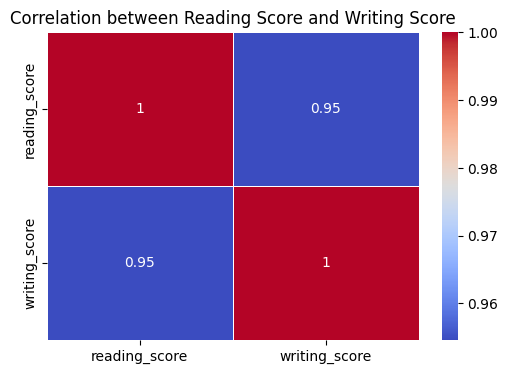

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# reading_score와 writing_score 컬럼 추출
scores_data = train_data[['reading_score', 'writing_score']]

# 상관관계 계산
correlation = scores_data.corr()

# 상관관계를 시각화 (히트맵)
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Reading Score and Writing Score')
plt.show()

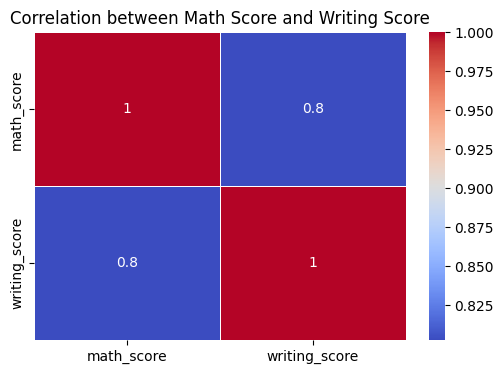

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# math_score와 writing_score 컬럼 추출
scores_data = train_data[['math_score', 'writing_score']]

# 상관관계 계산
correlation = scores_data.corr()

# 상관관계를 시각화 (히트맵)
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Math Score and Writing Score')
plt.show()
